In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
import plotly.express as px

In [2]:
epl24_def = pd.read_csv('/Users/amitmishra/epl_2425/team_data/epl2425_defense_cleaned.csv')
epl24_shots = pd.read_csv('/Users/amitmishra/epl_2425/team_data/epl2425_shooting_cleaned.csv')
epl24_gca = pd.read_csv('/Users/amitmishra/epl_2425/team_data/epl2425_gca_cleaned.csv')
epl24_std = pd.read_csv('/Users/amitmishra/epl_2425/team_data/epl2425_standard_cleaned.csv')
epl24_poss = pd.read_csv('/Users/amitmishra/epl_2425/team_data/epl2425_possession_cleaned.csv')
epl24_pass = pd.read_csv('/Users/amitmishra/epl_2425/team_data/epl2425_passing_cleaned.csv')

In [17]:
epl24_poss.columns

Index(['Squad', 'Players_used', 'Poss', '90s', 'Touches', 'Touches_DefPen',
       'Touches_Def3rd', 'Touches_Mid3rd', 'Touches_Att3rd', 'Touches_AttPen',
       'Touches_Live', 'TO_Att', 'TO_Succ', 'TO_Succ%', 'TO_Tkld', 'TO_Tkld%',
       'Carries', 'TotDist', 'PrgDist', 'PrgC', 'Carry1/3', 'Carry_PA', 'Mis',
       'Dis', 'Pass_Rec', 'Pass_PrgR'],
      dtype='object')

In [18]:
pass_stats = ['Squad', 'Pass_Cmp%','MedPass_Att','Pass_FinalTrd','Pass_PenArea']
gca_stats = ['Squad','SCA_Passlive','GCA_TO']
poss_stats = ['Squad','Touches_AttPen','PrgC','Carry_PA']
shots_stats = ['Squad','npxG','Shot_Dist','G/Sh']
def_stats = ['Squad','Tkl_Mid','Tkl_Att','Interceptions']

In [20]:
df = epl24_pass[pass_stats]
merged_df = df.merge(epl24_shots[shots_stats], on = 'Squad', how = 'left')
merged_df = merged_df.merge(epl24_gca[gca_stats], on = 'Squad', how = 'left')
merged_df = merged_df.merge(epl24_poss[poss_stats], on = 'Squad', how = 'left')
merged_df = merged_df.merge(epl24_def[def_stats], on = 'Squad', how = 'left')


merged_df.head()



,Squad,Pass_Cmp%,MedPass_Att,Pass_FinalTrd,Pass_PenArea,npxG,Shot_Dist,G/Sh,SCA_Passlive,GCA_TO,Touches_AttPen,PrgC,Carry_PA,Tkl_Mid,Tkl_Att,Interceptions
0,Arsenal,84.3,7999,1397,437,58.4,15.1,0.12,726,6,1282,852,286,249,129,225
1,Aston Villa,82.6,7386,1137,319,51.3,16.3,0.11,602,3,951,720,212,249,95,240
2,Bournemouth,76.8,6670,1242,339,58.5,16.7,0.09,767,5,1005,754,228,299,102,351
3,Brentford,78.1,6875,1104,325,54.4,14.9,0.14,569,5,987,598,213,223,121,285
4,Brighton,82.4,7472,1189,339,53.3,17.2,0.11,685,10,1085,816,263,297,121,315


In [35]:
final_df = merged_df.set_index('Squad')

In [37]:
#Standardize the data

scaler = StandardScaler()
scaled_df = scaler.fit_transform(final_df)

In [41]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.986943,0.580075,1.002996,1.611359,0.669692,-1.892088,0.920602,0.645126,-0.037823,1.571819,0.908049,0.906040,-0.418412,2.025006,-2.041550
1,0.480054,0.051872,-0.164061,0.023548,0.054182,-0.388442,0.379071,-0.315206,-1.172528,0.028214,0.048512,-0.118360,-0.418412,-0.167676,-1.642029
2,-1.249333,-0.565082,0.307250,0.292669,0.678361,0.112773,-0.703989,0.962655,-0.416058,0.280041,0.269908,0.103132,1.303447,0.283759,1.314422
3,-0.861712,-0.388440,-0.312188,0.104284,0.322926,-2.142696,2.003662,-0.570778,-0.416058,0.196098,-0.745909,-0.104516,-1.313779,1.509081,-0.443468
4,0.420420,0.125976,0.069350,0.292669,0.227565,0.739293,0.379071,0.327597,1.475115,0.653118,0.673630,0.587645,1.234573,1.509081,0.355573


Apply KMeans Clustering

In [42]:
num_clusters = 3
kmeans = KMeans(n_clusters = num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_df)

In [43]:
# add the cluster labels back to the final dataframe
final_df['cluster'] = cluster_labels

In [45]:
final_df['cluster']

Squad
Arsenal            2
Aston Villa        1
Bournemouth        1
Brentford          1
Brighton           1
Chelsea            2
Crystal Palace     0
Everton            0
Fulham             1
Ipswich Town       0
Leicester City     0
Liverpool          2
Manchester City    2
Manchester Utd     1
Newcastle Utd      1
Nott'ham Forest    0
Southampton        0
Tottenham          1
West Ham           0
Wolves             0
Name: cluster, dtype: int32

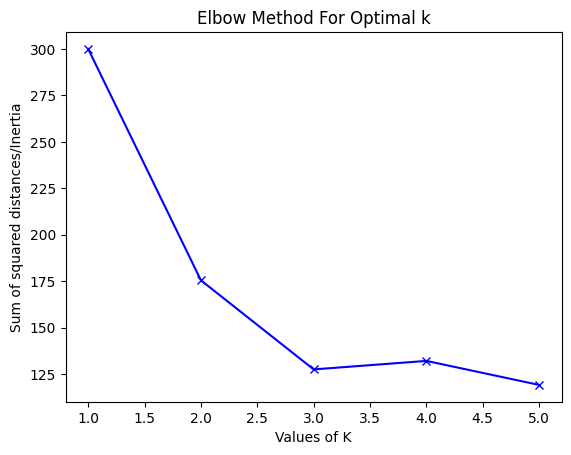

In [46]:
#Finding optimum clusters

sum_sd = []
k = range(1,6)
for num_clusters in k:
    kmeans = KMeans(n_clusters = num_clusters, random_state=42)
    kmeans.fit(scaled_df)
    sum_sd.append(kmeans.inertia_)
plt.plot(k,sum_sd,"bx-")
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances/Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

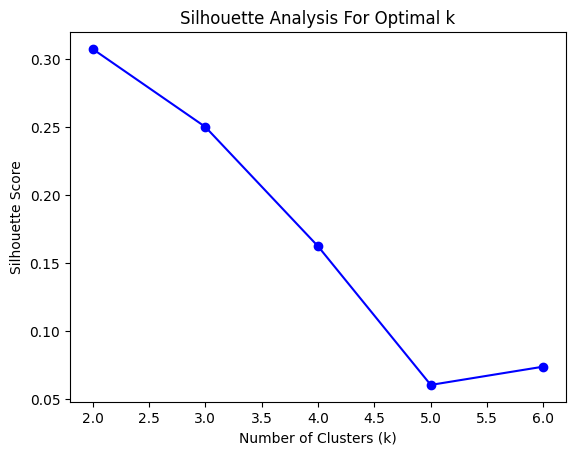

In [47]:
silhouette_scores = []
for k in range(2, 7):  # Silhouette score isn't defined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, cluster_labels))
    
plt.plot(range(2, 7), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()

In [48]:
final_df[final_df['cluster'] == 0]

,Pass_Cmp%,MedPass_Att,Pass_FinalTrd,Pass_PenArea,npxG,Shot_Dist,G/Sh,SCA_Passlive,GCA_TO,Touches_AttPen,PrgC,Carry_PA,Tkl_Mid,Tkl_Att,Interceptions,cluster
Squad,,,,,,,,,,,,,,,,
Crystal Palace,75.4,6317,886,272,57.3,16.8,0.09,633,6,797,510,126,299,94,334,0
Everton,76.3,5451,1003,261,40.2,16.8,0.09,530,6,732,486,119,269,97,345,0
Ipswich Town,78.0,5988,865,173,32.8,17.7,0.09,458,6,605,513,150,214,81,303,0
Leicester City,79.7,6664,953,216,30.4,17.3,0.09,427,6,632,576,143,278,89,327,0
Nott'ham Forest,75.3,5011,974,241,43.2,17.5,0.12,569,3,785,633,187,225,67,322,0
Southampton,83.7,7455,989,218,30.9,16.3,0.07,427,3,688,640,165,266,76,305,0
West Ham,80.7,7153,1075,267,44.7,16.3,0.08,582,3,839,632,175,253,84,331,0
Wolves,80.9,6712,1011,276,43.7,18.1,0.12,547,7,729,607,146,305,84,298,0


In [49]:
final_df[final_df['cluster'] == 1]

,Pass_Cmp%,MedPass_Att,Pass_FinalTrd,Pass_PenArea,npxG,Shot_Dist,G/Sh,SCA_Passlive,GCA_TO,Touches_AttPen,PrgC,Carry_PA,Tkl_Mid,Tkl_Att,Interceptions,cluster
Squad,,,,,,,,,,,,,,,,
Aston Villa,82.6,7386,1137,319,51.3,16.3,0.11,602,3,951,720,212,249,95,240,1
Bournemouth,76.8,6670,1242,339,58.5,16.7,0.09,767,5,1005,754,228,299,102,351,1
Brentford,78.1,6875,1104,325,54.4,14.9,0.14,569,5,987,598,213,223,121,285,1
Brighton,82.4,7472,1189,339,53.3,17.2,0.11,685,10,1085,816,263,297,121,315,1
Fulham,82.0,8198,1346,343,45.9,16.4,0.10,718,5,954,786,213,259,93,302,1
Manchester Utd,82.5,7768,1141,335,49.4,17.4,0.07,711,5,967,697,230,305,118,358,1
Newcastle Utd,81.6,7373,1149,399,59.5,15.9,0.12,711,3,1082,759,263,235,93,270,1
Tottenham,82.7,8289,1254,369,55.7,16.0,0.12,648,8,1001,840,249,271,105,322,1


In [50]:
final_df[final_df['cluster'] == 2]

,Pass_Cmp%,MedPass_Att,Pass_FinalTrd,Pass_PenArea,npxG,Shot_Dist,G/Sh,SCA_Passlive,GCA_TO,Touches_AttPen,PrgC,Carry_PA,Tkl_Mid,Tkl_Att,Interceptions,cluster
Squad,,,,,,,,,,,,,,,,
Arsenal,84.3,7999,1397,437,58.4,15.1,0.12,726,6,1282,852,286,249,129,225,2
Chelsea,84.6,9120,1488,346,63.8,16.7,0.10,811,9,1115,861,317,244,101,272,2
Liverpool,84.1,8905,1583,430,75.2,15.9,0.12,881,12,1315,825,322,267,104,299,2
Manchester City,88.1,9710,1685,440,64.9,16.9,0.11,852,11,1348,1146,404,216,98,229,2


In [51]:
final_df['cluster'] = final_df['cluster'].replace([0,1,2], ['Passive/Conservative', 'Balanced', 'Die Besten'])


In [55]:
features = ['Tkl_Att', 'Tkl_Mid','Interceptions','Pass_Cmp%', 'Pass_PenArea', 'Carry_PA', 
            'npxG', 'PrgC','G/Sh', 'GCA_TO','SCA_Passlive', 'Touches_AttPen']

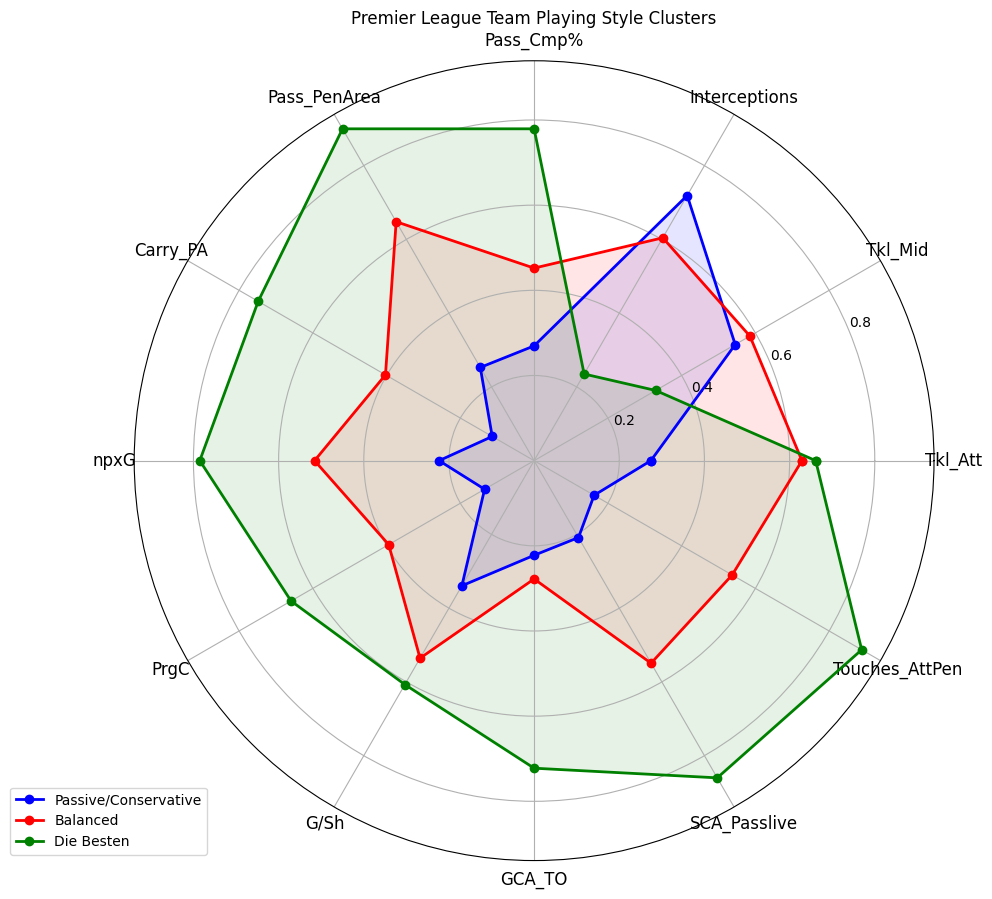

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Define your cluster labels
cluster_labels = ['Passive/Conservative', 'Balanced', 'Die Besten']

# Calculate cluster centroids
centroids = []
for label in cluster_labels:
    centroids.append(final_df[final_df['cluster'] == label][features].mean())

# Set up radar chart
def radar_chart(fig, variables, ranges, cluster_labels):
    # Calculate angles for each variable
    angles = np.linspace(0, 2*np.pi, len(variables), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop
    
    # Set up the subplot
    ax = fig.add_subplot(111, polar=True)
    
    # Add variable labels
    plt.xticks(angles[:-1], variables, size=12)
    
    # Draw the cluster profiles
    colors = ['blue', 'red', 'green']
    for i, label in enumerate(cluster_labels):
        values = centroids[i].values.flatten().tolist()
        # Scale values between 0 and 1 for better visualization
        scaled_values = [(val - ranges[j][0]) / (ranges[j][1] - ranges[j][0]) 
                        for j, val in enumerate(values)]
        scaled_values += scaled_values[:1]  # Close the loop
        
        ax.plot(angles, scaled_values, 'o-', linewidth=2, label=label, color=colors[i])
        ax.fill(angles, scaled_values, alpha=0.1, color=colors[i])
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    return ax

# Get min and max for each feature for scaling
ranges = [(final_df[feature].min(), final_df[feature].max()) for feature in features]

# Create the figure and plot
fig = plt.figure(figsize=(10, 10))
radar_chart(fig, features, ranges, cluster_labels)
plt.title('Premier League Team Playing Style Clusters', size=12)
plt.tight_layout()

In [57]:
# Print mean values for each cluster
for cluster in ['Passive/Conservative', 'Balanced', 'Die Besten']:
    print(f"\n{cluster} Cluster Mean Values:")
    print(final_df[final_df['cluster'] == cluster][features].mean().round(1))


Passive/Conservative Cluster Mean Values:
Tkl_Att            84.0
Tkl_Mid           263.6
Interceptions     320.6
Pass_Cmp%          78.8
Pass_PenArea      240.5
Carry_PA          151.4
npxG               40.4
PrgC              574.6
G/Sh                0.1
GCA_TO              5.0
SCA_Passlive      521.6
Touches_AttPen    725.9
dtype: float64

Balanced Cluster Mean Values:
Tkl_Att            106.0
Tkl_Mid            267.2
Interceptions      305.4
Pass_Cmp%           81.1
Pass_PenArea       346.0
Carry_PA           233.9
npxG                53.5
PrgC               746.2
G/Sh                 0.1
GCA_TO               5.5
SCA_Passlive       676.4
Touches_AttPen    1004.0
dtype: float64

Die Besten Cluster Mean Values:
Tkl_Att            108.0
Tkl_Mid            244.0
Interceptions      256.2
Pass_Cmp%           85.3
Pass_PenArea       413.2
Carry_PA           332.2
npxG                65.6
PrgC               921.0
G/Sh                 0.1
GCA_TO               9.5
SCA_Passlive       817.5


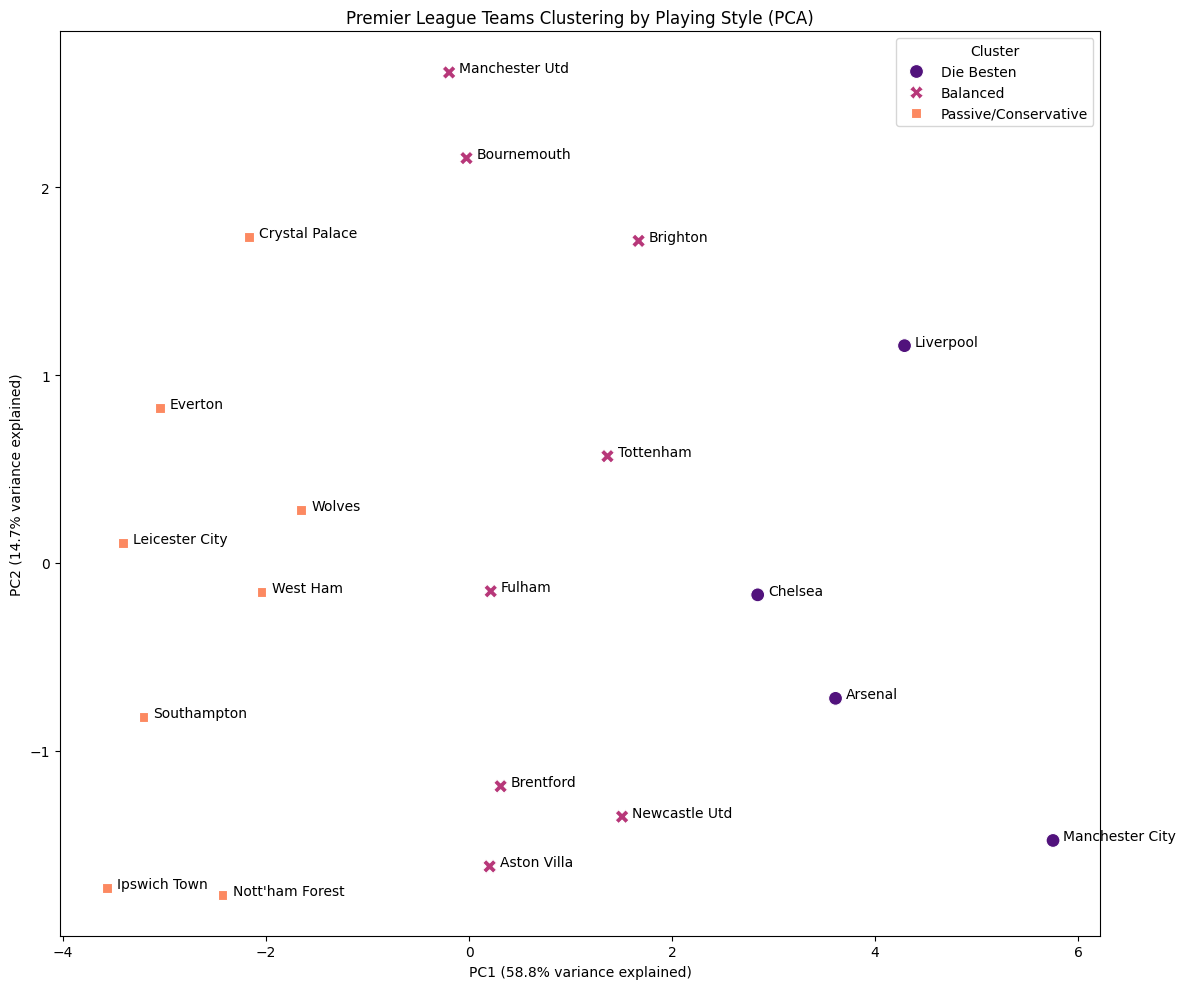

In [58]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize data for PCA
X = final_df[features].values
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Cluster': final_df['cluster'],
    'Squad': final_df.index if 'Squad' not in final_df.columns else final_df['Squad']
})

# Create scatter plot
plt.figure(figsize=(12, 10))
sns.scatterplot(data=plot_df, x='PC1', y='PC2', hue='Cluster', 
                palette='magma', s=100, style='Cluster')

# Annotate team names
for idx, row in plot_df.iterrows():
    plt.annotate(row['Squad'], 
                 (row['PC1'] + 0.1, row['PC2']), 
                 fontsize=10)

# Add explained variance
explained_var = pca.explained_variance_ratio_ * 100
plt.xlabel(f'PC1 ({explained_var[0]:.1f}% variance explained)')
plt.ylabel(f'PC2 ({explained_var[1]:.1f}% variance explained)')
plt.title('Premier League Teams Clustering by Playing Style (PCA)')
plt.tight_layout()